<a href="https://colab.research.google.com/github/Roja0230/MachineLearning-CodSoft/blob/main/CUSTOMER_CHURN_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pwd

'/content'

In [ ]:
#Import All Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, r2_score, precision_score, recall_score, f1_score

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shantanudhakadd/bank-customer-churn-prediction")

print("Path to dataset files:", path)


# Load CSV (choose smaller for speed in Colab)
df = pd.read_csv(f"{path}/Churn_Modelling.csv")
print(df.head())
print(df.info())

100%|██████████| 262k/262k [00:00<00:00, 47.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/shantanudhakadd/bank-customer-churn-prediction/versions/1
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exite

In [ ]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.size
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isnull().values.any()

np.False_

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=10000, step=1)

In [ ]:
print(df["Geography"].unique())
print(df["Gender"].unique())
print(df["NumOfProducts"].unique())
print(df["HasCrCard"].unique())
print(df["IsActiveMember"].unique())
print(df["Exited"].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']
[1 3 2 4]
[1 0]
[1 0]
[1 0]


In [ ]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df.axes

[RangeIndex(start=0, stop=10000, step=1),
 Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
        'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
        'IsActiveMember', 'EstimatedSalary', 'Exited'],
       dtype='object')]

In [ ]:
df.iloc[0:4]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0


In [ ]:
df.loc[:,"CustomerId"]

,CustomerId
0,15634602
1,15647311
2,15619304
3,15701354
4,15737888
...,...
9995,15606229
9996,15569892
9997,15584532
9998,15682355


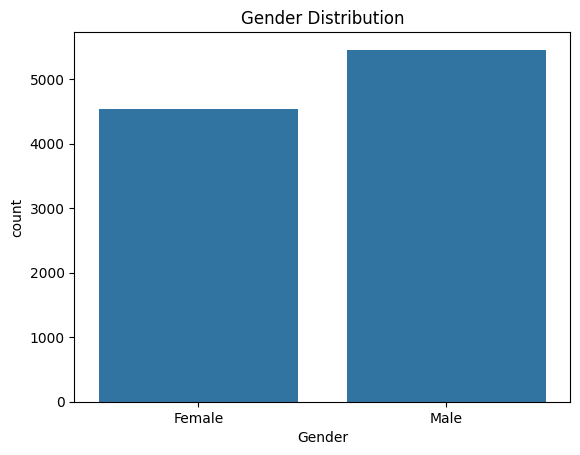

In [ ]:
#Data Visulization

sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

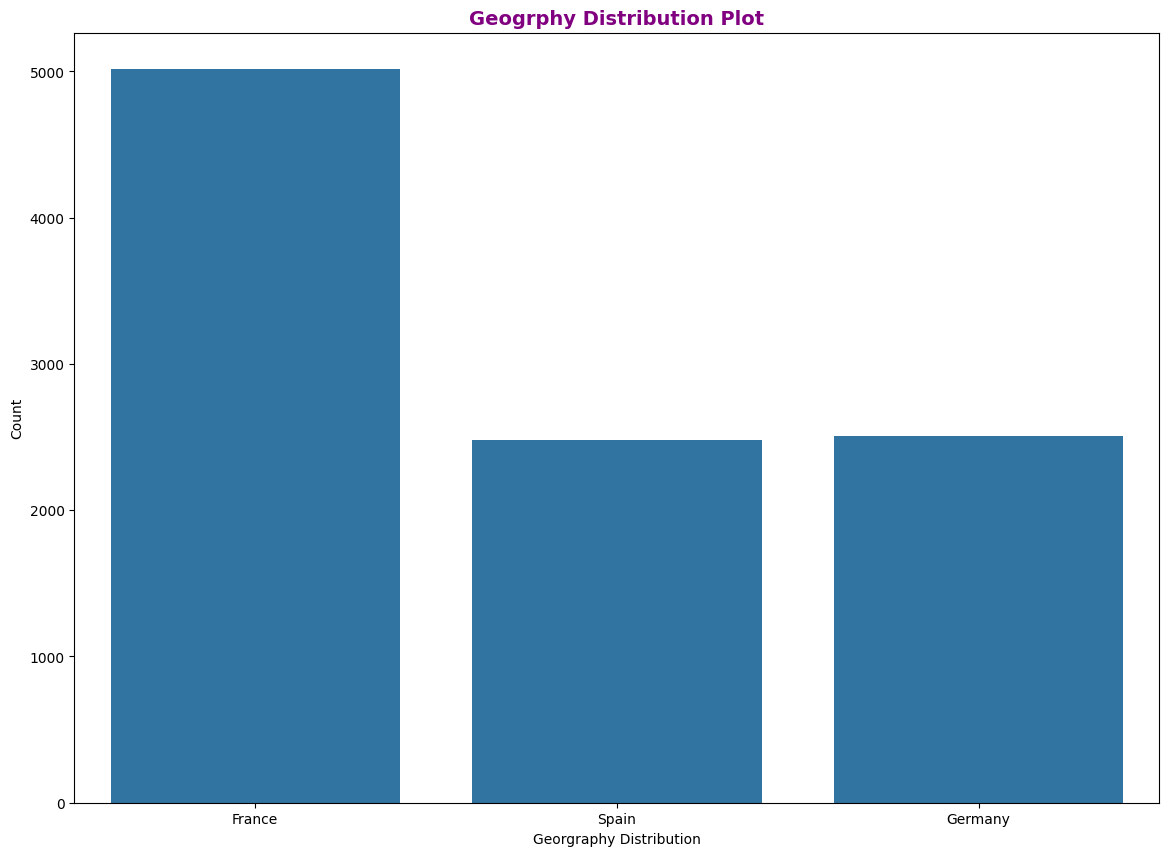

In [ ]:
plt.figure(figsize=(14,10))
sns.countplot(x='Geography', data=df)
plt.xlabel('Georgraphy Distribution')
plt.ylabel('Count')
plt.title('Geogrphy Distribution Plot', fontsize=14, fontweight="bold", color = "purple")
plt.show()

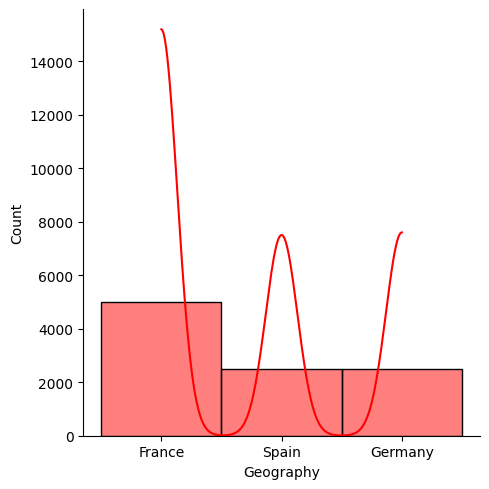

In [ ]:
sns.displot(df.Geography, kde=True, color='red')

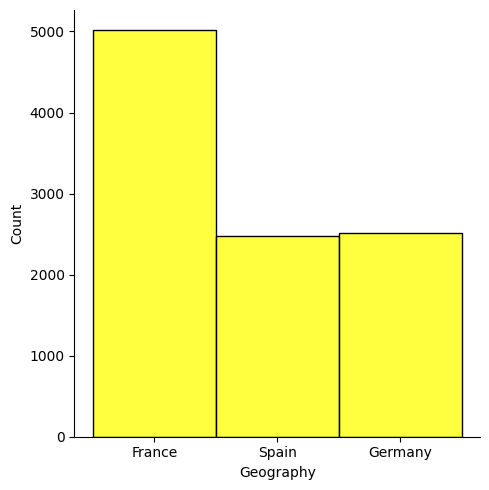

In [ ]:
sns.displot(df.Geography, color = "yellow")

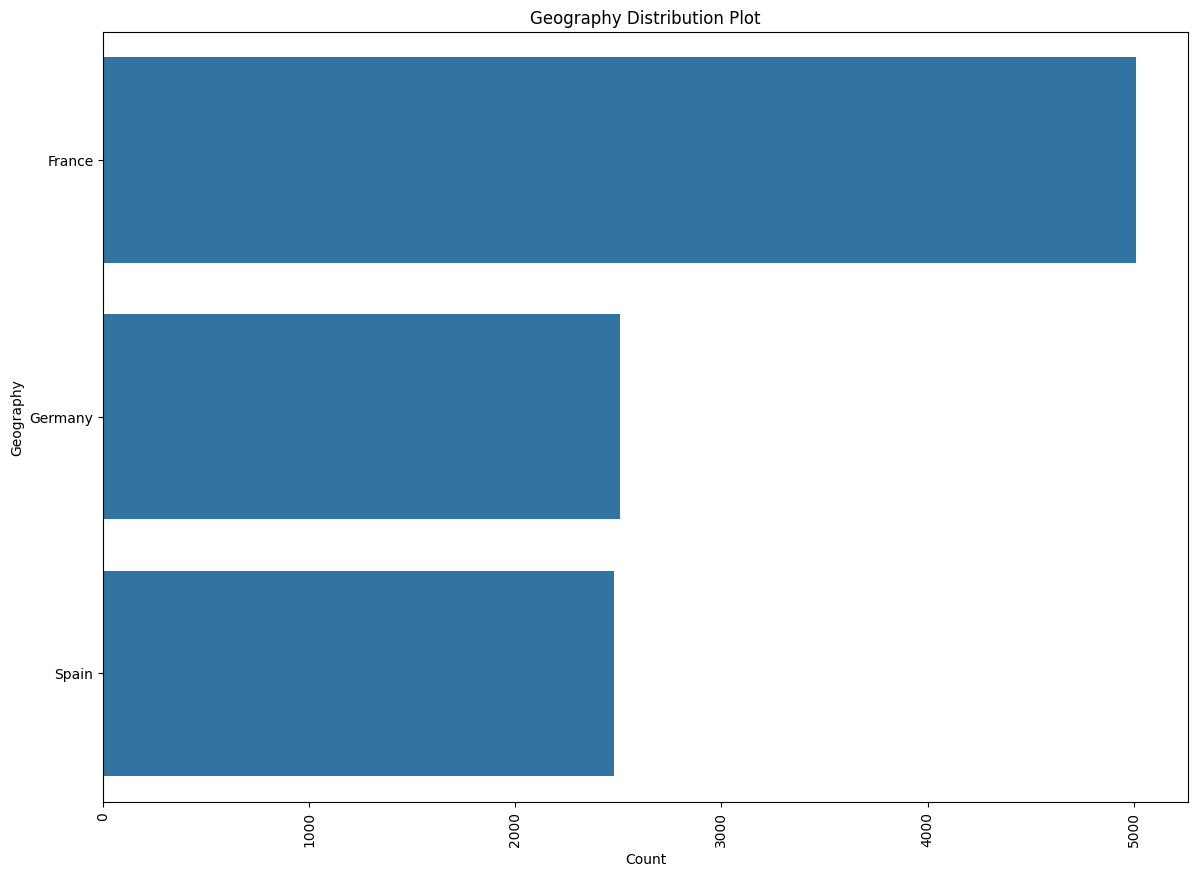

In [ ]:
plt.figure(figsize = (14,10))

count1 = df.Geography.value_counts()

sns.barplot(x = count1, y = count1.index, orient = 'h')

plt.xlabel('Count')

plt.ylabel('Geography')

plt.title('Geography Distribution Plot')

plt.xticks (rotation=90)

plt.show()

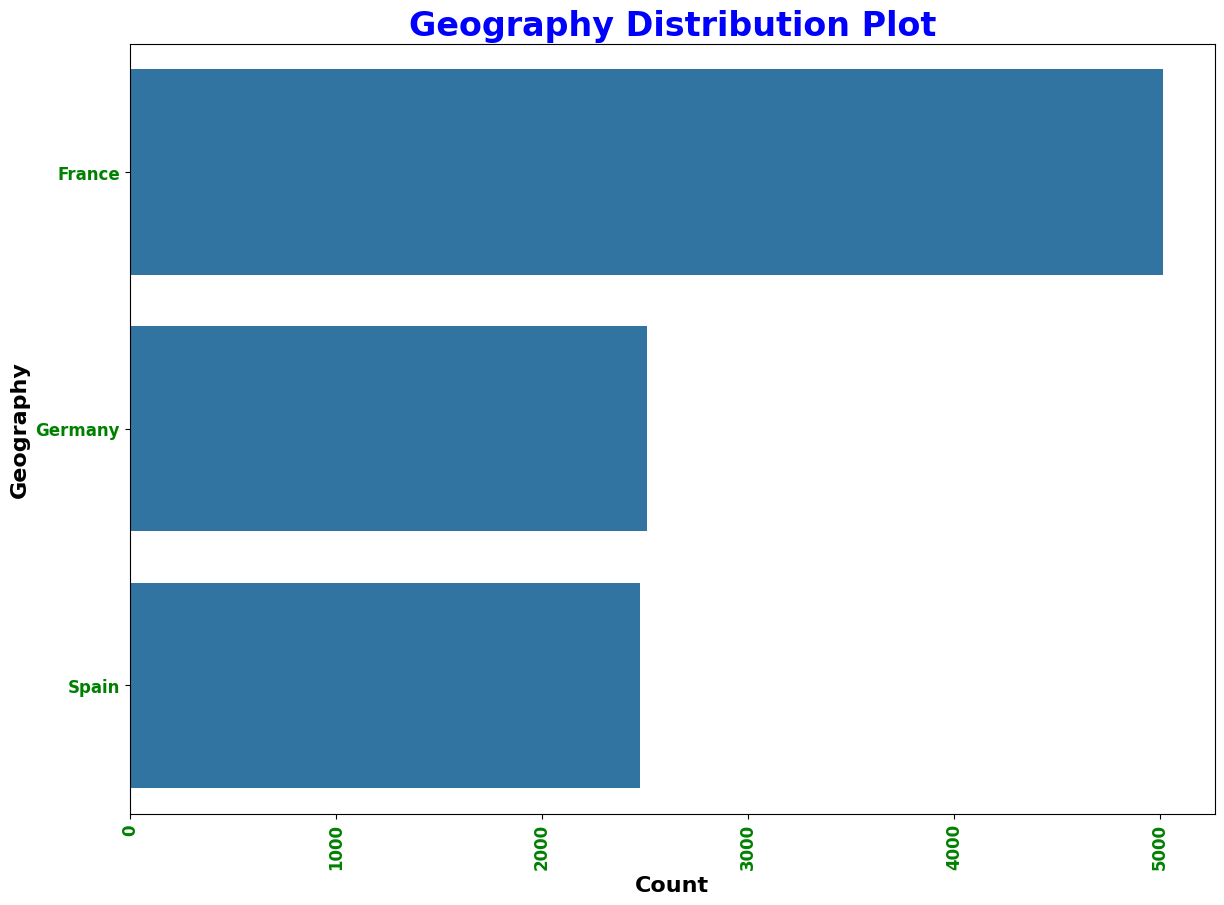

In [ ]:
plt.figure(figsize = (14,10))

count1 = df.Geography.value_counts()

sns.barplot(x = count1, y  = count1.index, orient = 'h')

plt.xlabel('Count', fontsize = 16, fontweight = 'bold')

plt.ylabel('Geography', fontsize = 16, fontweight = 'bold')

plt.title('Geography Distribution Plot', fontsize = 24, fontweight = 'bold', color = 'blue')

plt.xticks(rotation = 90, fontsize = 12, fontweight = 'bold', color = 'green')

plt.yticks(fontsize = 12, fontweight ='bold', color = 'green')

plt.show()

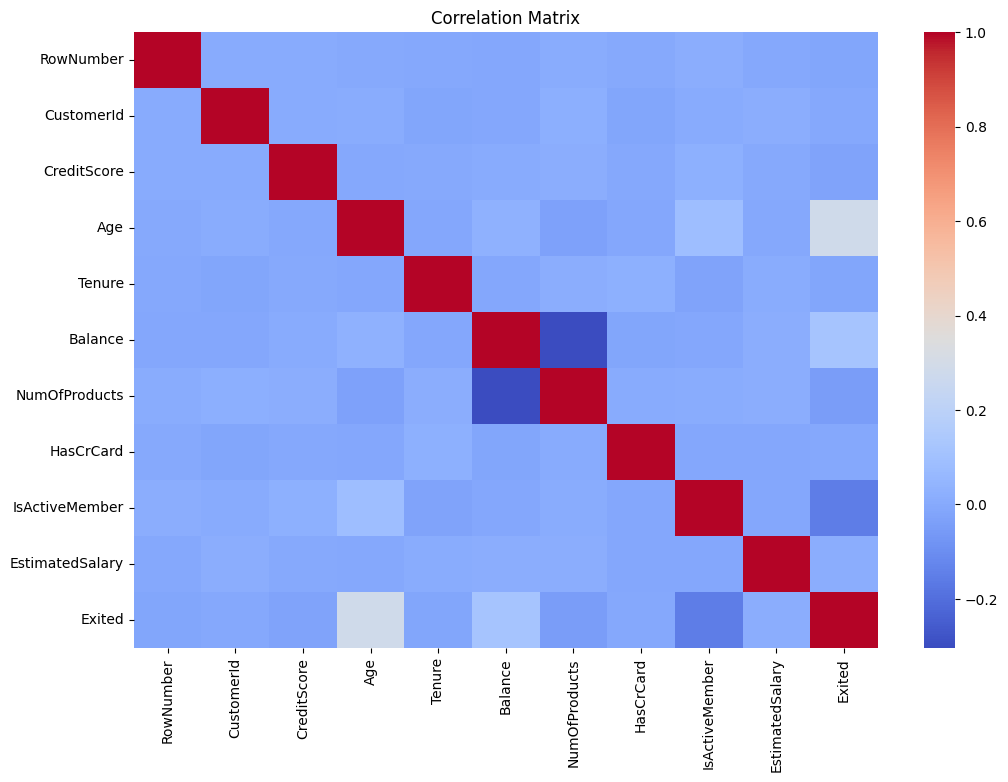

In [ ]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize = (12, 8))

sns.heatmap(correlation_matrix, cmap='coolwarm', annot = False, fmt=".2f")

plt.title('Correlation Matrix')

plt.show()

In [ ]:
# Preprocess the data

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.drop(labels = ["RowNumber","CustomerId","Surname"], axis = 1, inplace = True)

In [ ]:
df = pd.get_dummies(df, drop_first = True)

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [ ]:
x = df.drop("Exited", axis = 1)
y = df["Exited"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
Scaler = StandardScaler()
x_train = Scaler.fit_transform(x_train)
x_test = Scaler.transform(x_test)

In [ ]:
#Train Logistic Regression Model

lr_model = LogisticRegression()

In [ ]:
lr_model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
lr_predictions = lr_model.predict(x_test)

In [ ]:
print("Logistic Regression Model Performance:")
print(confusion_matrix(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))
print("Accuracy:", accuracy_score(y_test, lr_predictions))
print("Precision:", precision_score(y_test, lr_predictions))
print("Recall:", recall_score(y_test, lr_predictions))
print("F1 Score:", f1_score(y_test, lr_predictions))

Logistic Regression Model Performance:
[[1543   64]
 [ 314   79]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Accuracy: 0.811
Precision: 0.5524475524475524
Recall: 0.2010178117048346
F1 Score: 0.2947761194029851


In [ ]:
# Train Random Forests Model

rf_model = RandomForestClassifier(n_estimators = 1000, n_jobs = -1, random_state = 42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [ ]:
rf_prediction = rf_model.predict(x_test)

In [ ]:
print("Random Forest Model Performance:")
print(confusion_matrix(y_test, rf_prediction))
print(classification_report(y_test, rf_prediction))
print("Accuracy:", accuracy_score(y_test, rf_prediction))
print("r2_Score:", r2_score(y_test, rf_prediction))
print("Precision:", precision_score(y_test, rf_prediction))
print("Recall:", recall_score(y_test, rf_prediction))
print("F1 Score:", f1_score(y_test, rf_prediction))

Random Forest Model Performance:
[[1547   60]
 [ 209  184]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

Accuracy: 0.8655
r2_Score: 0.1481289713736499
Precision: 0.7540983606557377
Recall: 0.4681933842239186
F1 Score: 0.5777080062794349


In [ ]:
#Train Gradient Boosting Model

gb_model = GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators = 1000, random_state = 42)
gb_model.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000,
                           random_state=42)

In [ ]:
gdp_prediction = gb_model.predict(x_test)

In [ ]:
print("Gradient Boosting Model Performance:")
print(confusion_matrix(y_test, gdp_prediction))
print(classification_report(y_test, gdp_prediction))
print("Accuracy:", accuracy_score(y_test, gdp_prediction))
print("r2_Score:", r2_score(y_test, gdp_prediction))
print("Precision:", precision_score(y_test, gdp_prediction))
print("Recall:", recall_score(y_test, gdp_prediction))
print("F1 Score:", f1_score(y_test, gdp_prediction))

Gradient Boosting Model Performance:
[[1550   57]
 [ 224  169]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1607
           1       0.75      0.43      0.55       393

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000

Accuracy: 0.8595
r2_Score: 0.11012728979924014
Precision: 0.7477876106194691
Recall: 0.4300254452926209
F1 Score: 0.5460420032310178
